In [59]:
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [2]:
df = pd.read_csv('post_abtest_data.csv')

In [3]:
df['converted'] = df['order_made']/df['price_seen']

In [5]:
d = (df[df['surge'] == 'surge'].groupby(['group', 'user_id', 'date'])['converted'].mean().unstack().reset_index()
         .fillna(0).set_index('user_id'))

In [34]:
#удалить лишние строки
p = np.random.choice(d[d['group']=='Control'].index,size=60,replace=False)
p1 = d.drop(p)

In [36]:
res = p1.pivot_table(index=['user_id'], columns='group')
res.columns = [' '.join(col).strip() for col in res.columns.values]

In [37]:
res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16890 entries, 100093 to 999978
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   2020-05-25 Control  8445 non-null   float64
 1   2020-05-25 Test     8445 non-null   float64
 2   2020-05-26 Control  8445 non-null   float64
 3   2020-05-26 Test     8445 non-null   float64
 4   2020-05-27 Control  8445 non-null   float64
 5   2020-05-27 Test     8445 non-null   float64
 6   2020-05-28 Control  8445 non-null   float64
 7   2020-05-28 Test     8445 non-null   float64
 8   2020-05-29 Control  8445 non-null   float64
 9   2020-05-29 Test     8445 non-null   float64
 10  2020-05-30 Control  8445 non-null   float64
 11  2020-05-30 Test     8445 non-null   float64
 12  2020-05-31 Control  8445 non-null   float64
 13  2020-05-31 Test     8445 non-null   float64
dtypes: float64(14)
memory usage: 1.9 MB


In [70]:
result_1 = st.ttest_ind(res['2020-05-25 Control'], res['2020-05-25 Test'], equal_var = False, nan_policy = 'omit')
pvalue_1 = result_1[1]

In [71]:
result_2 = st.ttest_ind(res['2020-05-26 Control'], res['2020-05-26 Test'], equal_var = False, nan_policy = 'omit')
pvalue_2 = result_2[1]

In [72]:
result_3 = st.ttest_ind(res['2020-05-27 Control'], res['2020-05-27 Test'], equal_var = False, nan_policy = 'omit')
pvalue_3 = result_3[1]

In [73]:
result_4 = st.ttest_ind(res['2020-05-28 Control'], res['2020-05-28 Test'], equal_var = False, nan_policy = 'omit')
pvalue_4 = result_4[1]

In [74]:
result_5 = st.ttest_ind(res['2020-05-29 Control'], res['2020-05-29 Test'], equal_var = False, nan_policy = 'omit')
pvalue_5 = result_5[1]

In [75]:
result_6 = st.ttest_ind(res['2020-05-30 Control'], res['2020-05-30 Test'], equal_var = False, nan_policy = 'omit')
pvalue_6 = result_6[1]

In [76]:
result_7 = st.ttest_ind(res['2020-05-31 Control'], res['2020-05-31 Test'], equal_var = False, nan_policy = 'omit')
pvalue_7 = result_7[1]

In [77]:
new = pd.DataFrame({'date' : ['2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29', '2020-05-30', '2020-05-31']
                   ,'P-value': [pvalue_1, pvalue_2, pvalue_3, pvalue_4, pvalue_5, pvalue_6, pvalue_7]})
new

,date,P-value
0,2020-05-25,0.002281
1,2020-05-26,0.948931
2,2020-05-27,0.200064
3,2020-05-28,0.820077
4,2020-05-29,0.500784
5,2020-05-30,0.481233
6,2020-05-31,0.494040


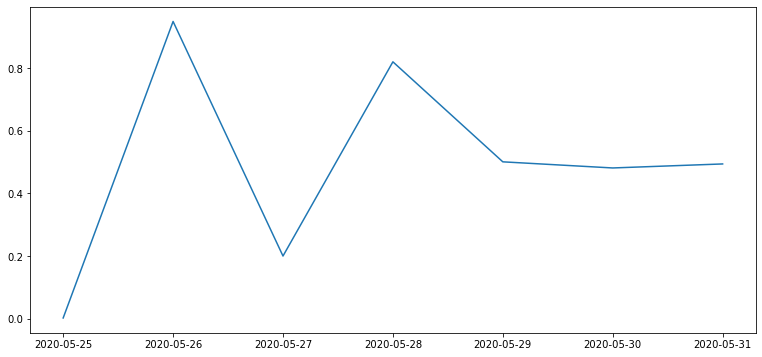

In [78]:
plt.plot(new['date'], new['P-value'])

Большинство значений p-value больше уровня значимости 5%
Вывывод: между группами разницы нет, значит Понижение коэффициента surge не привило к значимым изменениям 